In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [126]:
# Load datasets
task_energy_df = pd.read_excel('/Users/luciadelatorre/Desktop/COLUMBIA/GitHub/aienergyscore/energy_consumption_per_task.xlsx', sheet_name='averages')
least_efficient_models_df = pd.read_excel('/Users/luciadelatorre/Desktop/COLUMBIA/GitHub/aienergyscore/least_efficient_models.xlsx')
most_efficient_models_df = pd.read_excel('/Users/luciadelatorre/Desktop/COLUMBIA/GitHub/aienergyscore/most_efficient_energy_models.xlsx')
environmental_impacts_df = pd.read_excel('/Users/luciadelatorre/Desktop/COLUMBIA/GitHub/aienergyscore/environmental_impacts_per_region.xlsx')

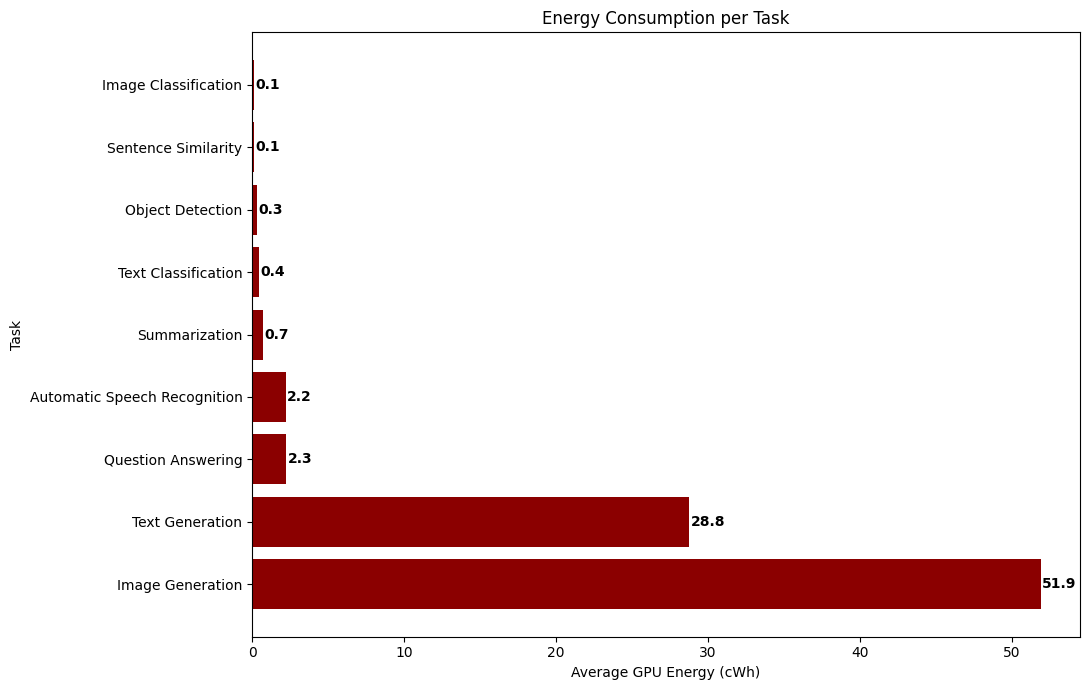

In [134]:
# Visualize energy consumption per task
task_energy_df = task_energy_df.sort_values('Average (cWh)', ascending=False)
plt.figure(figsize=(11, 7))
bars = plt.barh(task_energy_df['Task'], task_energy_df['Average (cWh)'], color='darkred')
plt.xlabel('Average GPU Energy (cWh)')
plt.ylabel('Task')
plt.title('Energy Consumption per Task')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.1f}', 
             va='center', fontweight='bold')
plt.tight_layout()
plt.savefig('task_energy_df.png', dpi=300)
plt.savefig("task_energy_df.svg", format="svg", dpi=300)
plt.show()

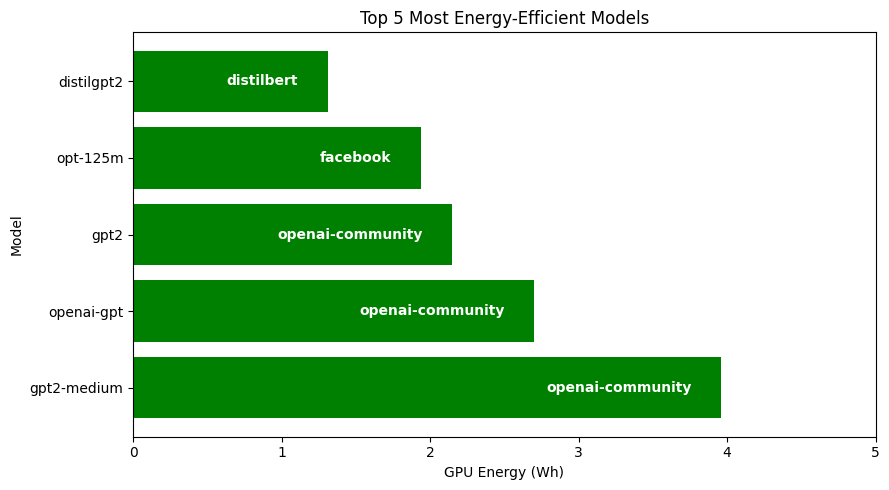

In [129]:
# Visualize most efficient models
most_efficient_models_df = most_efficient_models_df.sort_values('GPU Energy (Wh)', ascending=False)
plt.figure(figsize=(9, 5))
bars = plt.barh(most_efficient_models_df['Model'], most_efficient_models_df['GPU Energy (Wh)'], color='green')
plt.xlim(0, 5)
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width - 0.2, bar.get_y() + bar.get_height()/2, 
             f"{most_efficient_models_df.iloc[i]['Provider']}", va='center', ha='right', color='white', fontweight='bold')
plt.xlabel('GPU Energy (Wh)')
plt.ylabel('Model')
plt.title('Top 5 Most Energy-Efficient Models')
plt.tight_layout()
plt.savefig('most_efficient_models.png', dpi=300)
plt.savefig("most_efficient_models.svg", format="svg", dpi=300)
plt.show()

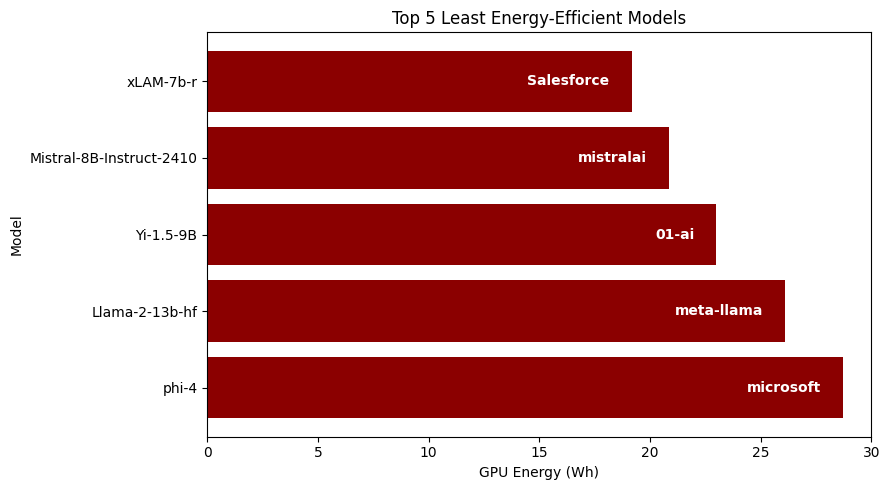

In [130]:
# Visualize least efficient models
least_efficient_models_df = least_efficient_models_df.sort_values('GPU Energy (Wh)', ascending=False)
plt.figure(figsize=(9, 5))
bars = plt.barh(least_efficient_models_df['Model'], least_efficient_models_df['GPU Energy (Wh)'], color='darkred')
plt.xlim(0, 30)
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width - 1, bar.get_y() + bar.get_height()/2, 
             f"{least_efficient_models_df.iloc[i]['Provider']}", va='center', ha='right', color='white', fontweight='bold')
plt.xlabel('GPU Energy (Wh)')
plt.ylabel('Model')
plt.title('Top 5 Least Energy-Efficient Models')
plt.tight_layout()
plt.savefig('least_efficient_models.png', dpi=300)
plt.savefig("least_efficient_models.svg", format="svg", dpi=300)
plt.show()


In [131]:
import pandas as pd
from IPython.display import display, HTML

# Environmental impact data table
environmental_impact_data = {
    'Area or Country': ['Worldwide', 'Europe (EEA)', 'USA', 'China', 'France'],
    'ADPe (kg Sb eq / kWh)': [7.378e-8, 6.423e-8, 9.855e-8, 8.515e-8, 4.858e-8],  # Numeric values for sorting
    'PE (MJ / kWh)': [9.99, 12.9, 11.4, 14.1, 11.3]
}

environmental_impact_df = pd.DataFrame(environmental_impact_data)

environmental_impact_df = environmental_impact_df.sort_values(by='ADPe (kg Sb eq / kWh)', ascending=False)

environmental_impact_html = environmental_impact_df.to_html(index=False, justify='center', classes='table table-striped')

display(HTML("<h3>Environmental Impacts by Region</h3>" + environmental_impact_html))
plt.savefig("environmental_impacts.svg", format="svg")

Area or Country,ADPe (kg Sb eq / kWh),PE (MJ / kWh)
USA,9.855000e-08,11.40
China,8.515000e-08,14.10
Worldwide,7.378000e-08,9.99
Europe (EEA),6.423000e-08,12.90
France,4.858000e-08,11.30


<Figure size 640x480 with 0 Axes>

In [88]:
# Saving table
import pandas as pd

# Environmental impact data table
environmental_impact_data = {
    'Area or Country': ['Worldwide', 'Europe (EEA)', 'USA', 'China', 'France'],
    'ADPe (kg Sb eq / kWh)': [7.378e-8, 6.423e-8, 9.855e-8, 8.515e-8, 4.858e-8],  # Numeric values for sorting
    'PE (MJ / kWh)': [9.99, 12.9, 11.4, 14.1, 11.3]
}
environmental_impact_df = pd.DataFrame(environmental_impact_data)
environmental_impact_df = environmental_impact_df.sort_values(by='ADPe (kg Sb eq / kWh)', ascending=False)

# Generate HTML table
environmental_impact_html = environmental_impact_df.to_html(index=False, justify='center', classes='table table-striped')

# Save the HTML content to a file
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Environmental Impacts by Region</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 20px;
        }}
        .table {{
            width: 100%;
            border-collapse: collapse;
        }}
        .table th, .table td {{
            border: 1px solid #ddd;
            padding: 8px;
            text-align: center;
        }}
        .table th {{
            background-color: #f2f2f2;
        }}
    </style>
</head>
<body>
    <h3>Environmental Impacts by Region</h3>
    {environmental_impact_html}
</body>
</html>
"""

with open("environmental_impacts.html", "w", encoding="utf-8") as file:
    file.write(html_content)

print("HTML file saved as 'environmental_impacts.html'")

HTML file saved as 'environmental_impacts.html'


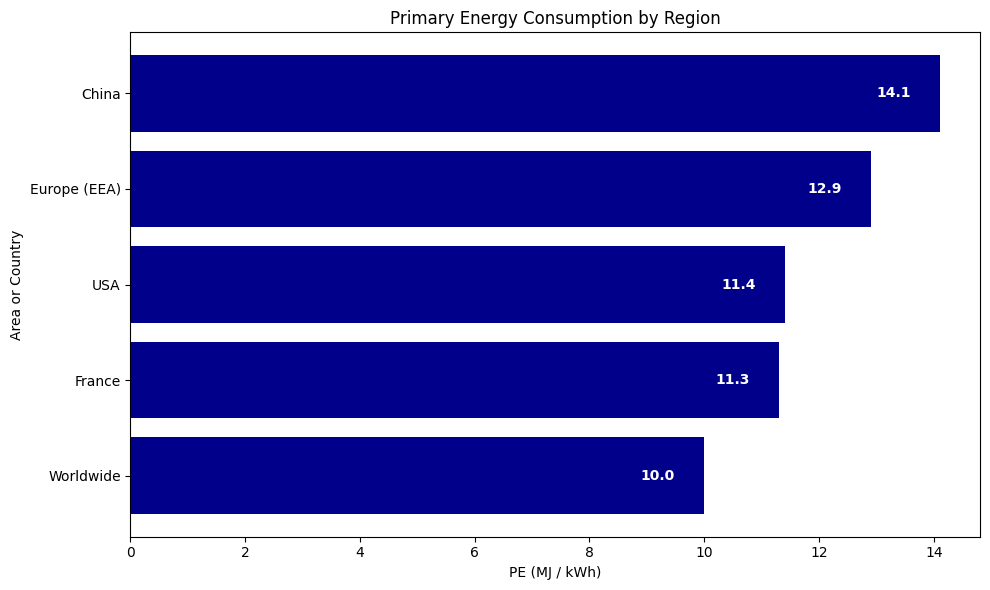

In [120]:
# Visualize environmental impact per Primary Energy (how much primary energy required to produce a kW of electricity)
# Sort by PE in ascending order
environmental_impact_df = environmental_impact_df.sort_values(by='PE (MJ / kWh)', ascending=True)

# Plot PE visualization
plt.figure(figsize=(10, 6))
bars = plt.barh(environmental_impact_df['Area or Country'], environmental_impact_df['PE (MJ / kWh)'], color='darkblue')
plt.xlabel('PE (MJ / kWh)')
plt.ylabel('Area or Country')
plt.title('Primary Energy Consumption by Region')

# Add annotations inside the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width - 0.5, bar.get_y() + bar.get_height()/2, f'{width:.1f}', 
             va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('environmental_impacts_pe.png', dpi=300)
plt.savefig("environmental_impacts_pe.svg", format="svg", dpi=300)
plt.show()

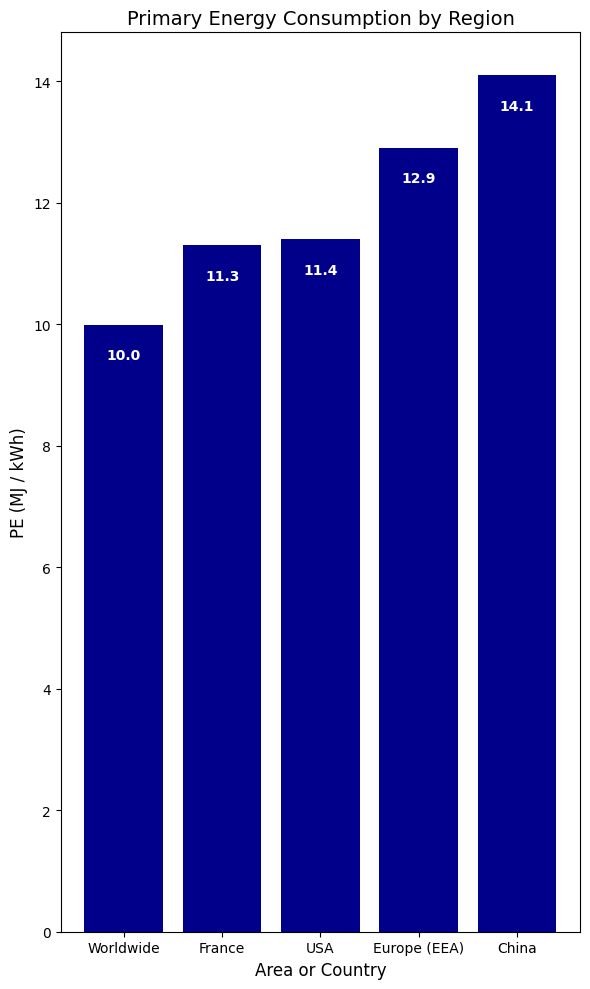

In [119]:
environmental_impact_data = {
    'Area or Country': ['Worldwide', 'Europe (EEA)', 'USA', 'China', 'France'],
    'ADPe (kg Sb eq / kWh)': [7.378e-8, 6.423e-8, 9.855e-8, 8.515e-8, 4.858e-8],
    'PE (MJ / kWh)': [9.99, 12.9, 11.4, 14.1, 11.3]
}

environmental_impact_df = pd.DataFrame(environmental_impact_data)
environmental_impact_df = environmental_impact_df.sort_values(by='PE (MJ / kWh)', ascending=True)

plt.figure(figsize=(6, 10))
bars = plt.bar(environmental_impact_df['Area or Country'], environmental_impact_df['PE (MJ / kWh)'], color='darkblue')
plt.xlabel('Area or Country', fontsize=12)
plt.ylabel('PE (MJ / kWh)', fontsize=12)
plt.title('Primary Energy Consumption by Region', fontsize=14)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.5, f'{height:.1f}', 
             va='center', ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('environmental_impacts_pe_phone.svg', format='svg', dpi=300)

plt.show()

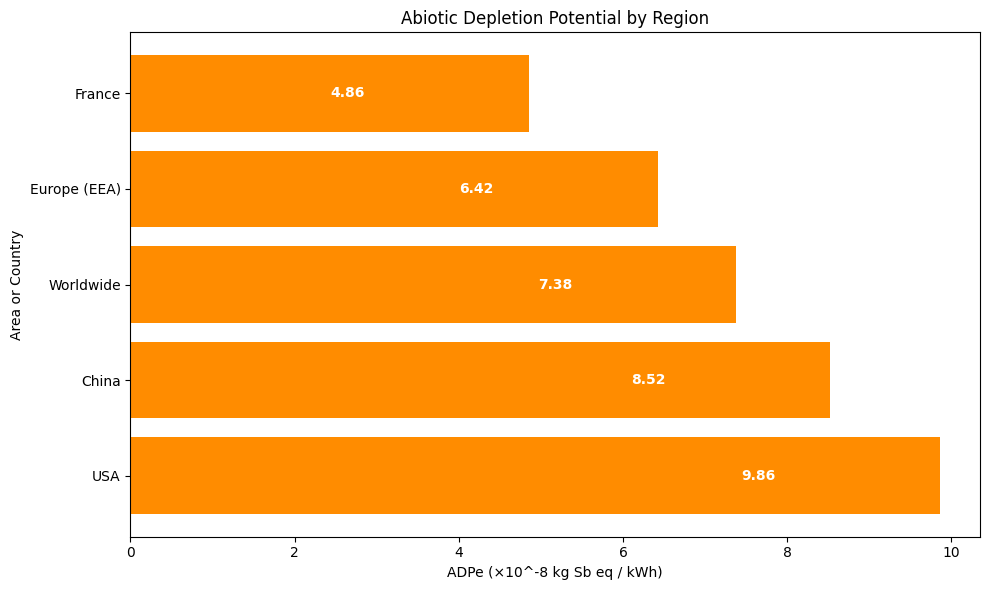

In [121]:
# Visualize environmental impact per Abiotic Depletion Potential (environmental destruction)
environmental_impact_data = {
    'Area or Country': ['Worldwide', 'Europe (EEA)', 'USA', 'China', 'France'],
    'ADPe (kg Sb eq / kWh)': [7.378e-8, 6.423e-8, 9.855e-8, 8.515e-8, 4.858e-8],
    'PE (MJ / kWh)': [9.99, 12.9, 11.4, 14.1, 11.3]
}

environmental_impact_df = pd.DataFrame(environmental_impact_data)

environmental_impact_df = environmental_impact_df.sort_values(by='ADPe (kg Sb eq / kWh)', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(environmental_impact_df['Area or Country'], environmental_impact_df['ADPe (kg Sb eq / kWh)'] * 1e8, color='darkorange')
plt.xlabel('ADPe (×10^-8 kg Sb eq / kWh)')
plt.ylabel('Area or Country')
plt.title('Abiotic Depletion Potential by Region')

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width - 2, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
             va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.savefig("environmental_impacts_adp.svg", format="svg", dpi=300)
plt.show()

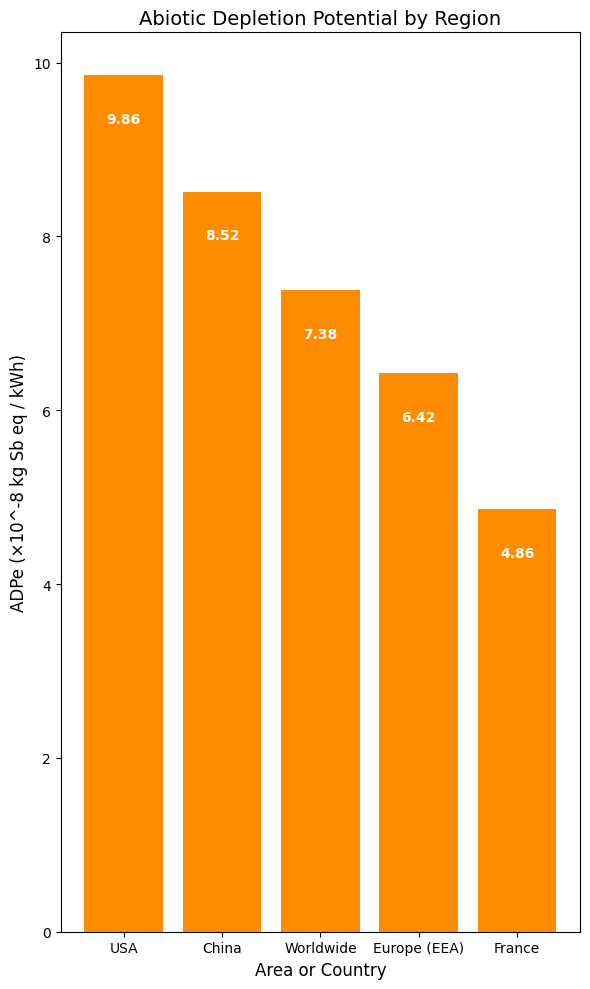

In [118]:
# Visualize environmental impact per Abiotic Depletion Potential (environmental destruction) - regular bar chart
import pandas as pd
import matplotlib.pyplot as plt

environmental_impact_data = {
    'Area or Country': ['Worldwide', 'Europe (EEA)', 'USA', 'China', 'France'],
    'ADPe (kg Sb eq / kWh)': [7.378e-8, 6.423e-8, 9.855e-8, 8.515e-8, 4.858e-8],
    'PE (MJ / kWh)': [9.99, 12.9, 11.4, 14.1, 11.3]
}

environmental_impact_df = pd.DataFrame(environmental_impact_data)
environmental_impact_df = environmental_impact_df.sort_values(by='ADPe (kg Sb eq / kWh)', ascending=False)

plt.figure(figsize=(6, 10))
bars = plt.bar(environmental_impact_df['Area or Country'], environmental_impact_df['ADPe (kg Sb eq / kWh)'] * 1e8, color='darkorange')
plt.xlabel('Area or Country', fontsize=12)
plt.ylabel('ADPe (×10^-8 kg Sb eq / kWh)', fontsize=12)
plt.title('Abiotic Depletion Potential by Region', fontsize=14)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.5, f'{height:.2f}', 
             va='center', ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('environmental_impacts_adp_phone.svg', format='svg', dpi=300)
plt.show()